In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex

In [48]:
df = pd.read_csv('Dataset_spine.csv')

In [49]:
df = df.rename(columns = {'Col1':'pelvic_incidence','Col2':'pelvic tilt','Col3':'lumbar_lordosis_angle','Col4':'sacral_slope','Col5':'pelvic_radius'})
df = df.rename(columns = {'Col6':'degree_spondylolisthesis','Col7':'pelvic_shape','Col8':'Direct_tilt','Col9':'thoracic_slope','Col10':'cervical_tilt','Col11':'sacrum_angle','Col12':'scoliosis_slope'})
del df['Unnamed: 13']
df.head()
#12 columns of features and predicting Class_att (whether abnormal or normal)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_shape,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [50]:
df.info() # No null values and all the features are in float format except Class_att

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_shape              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [51]:
df.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_shape,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


<AxesSubplot:xlabel='Class_att', ylabel='count'>

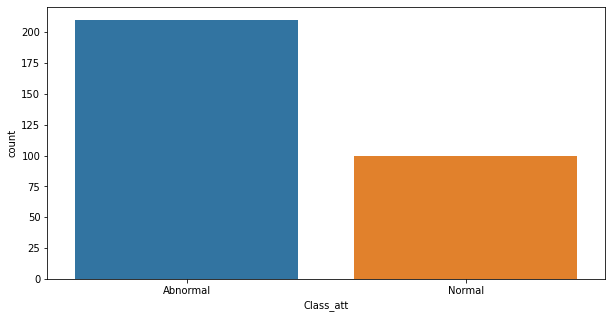

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Class_att',data=df)
# Abnormal cases are around 2 times more than normal cases, this can affect the model

<AxesSubplot:>

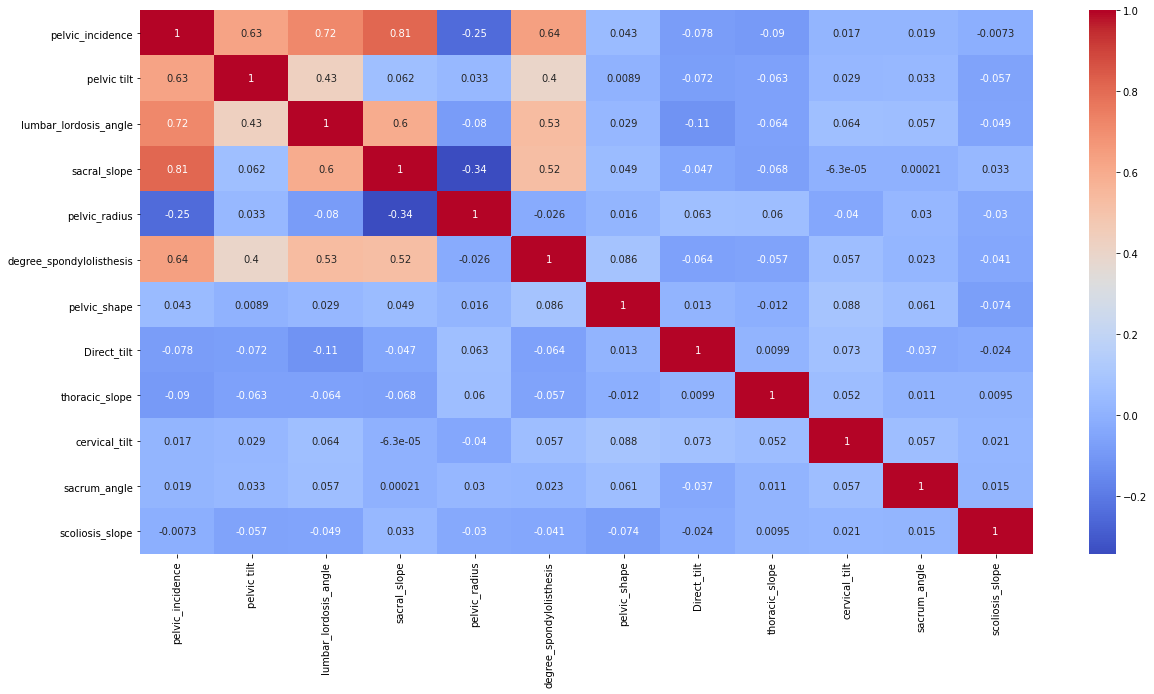

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm') 
#Peliv_incidence is strongly correlated to many other attributes, same with lumbar lordosis angle

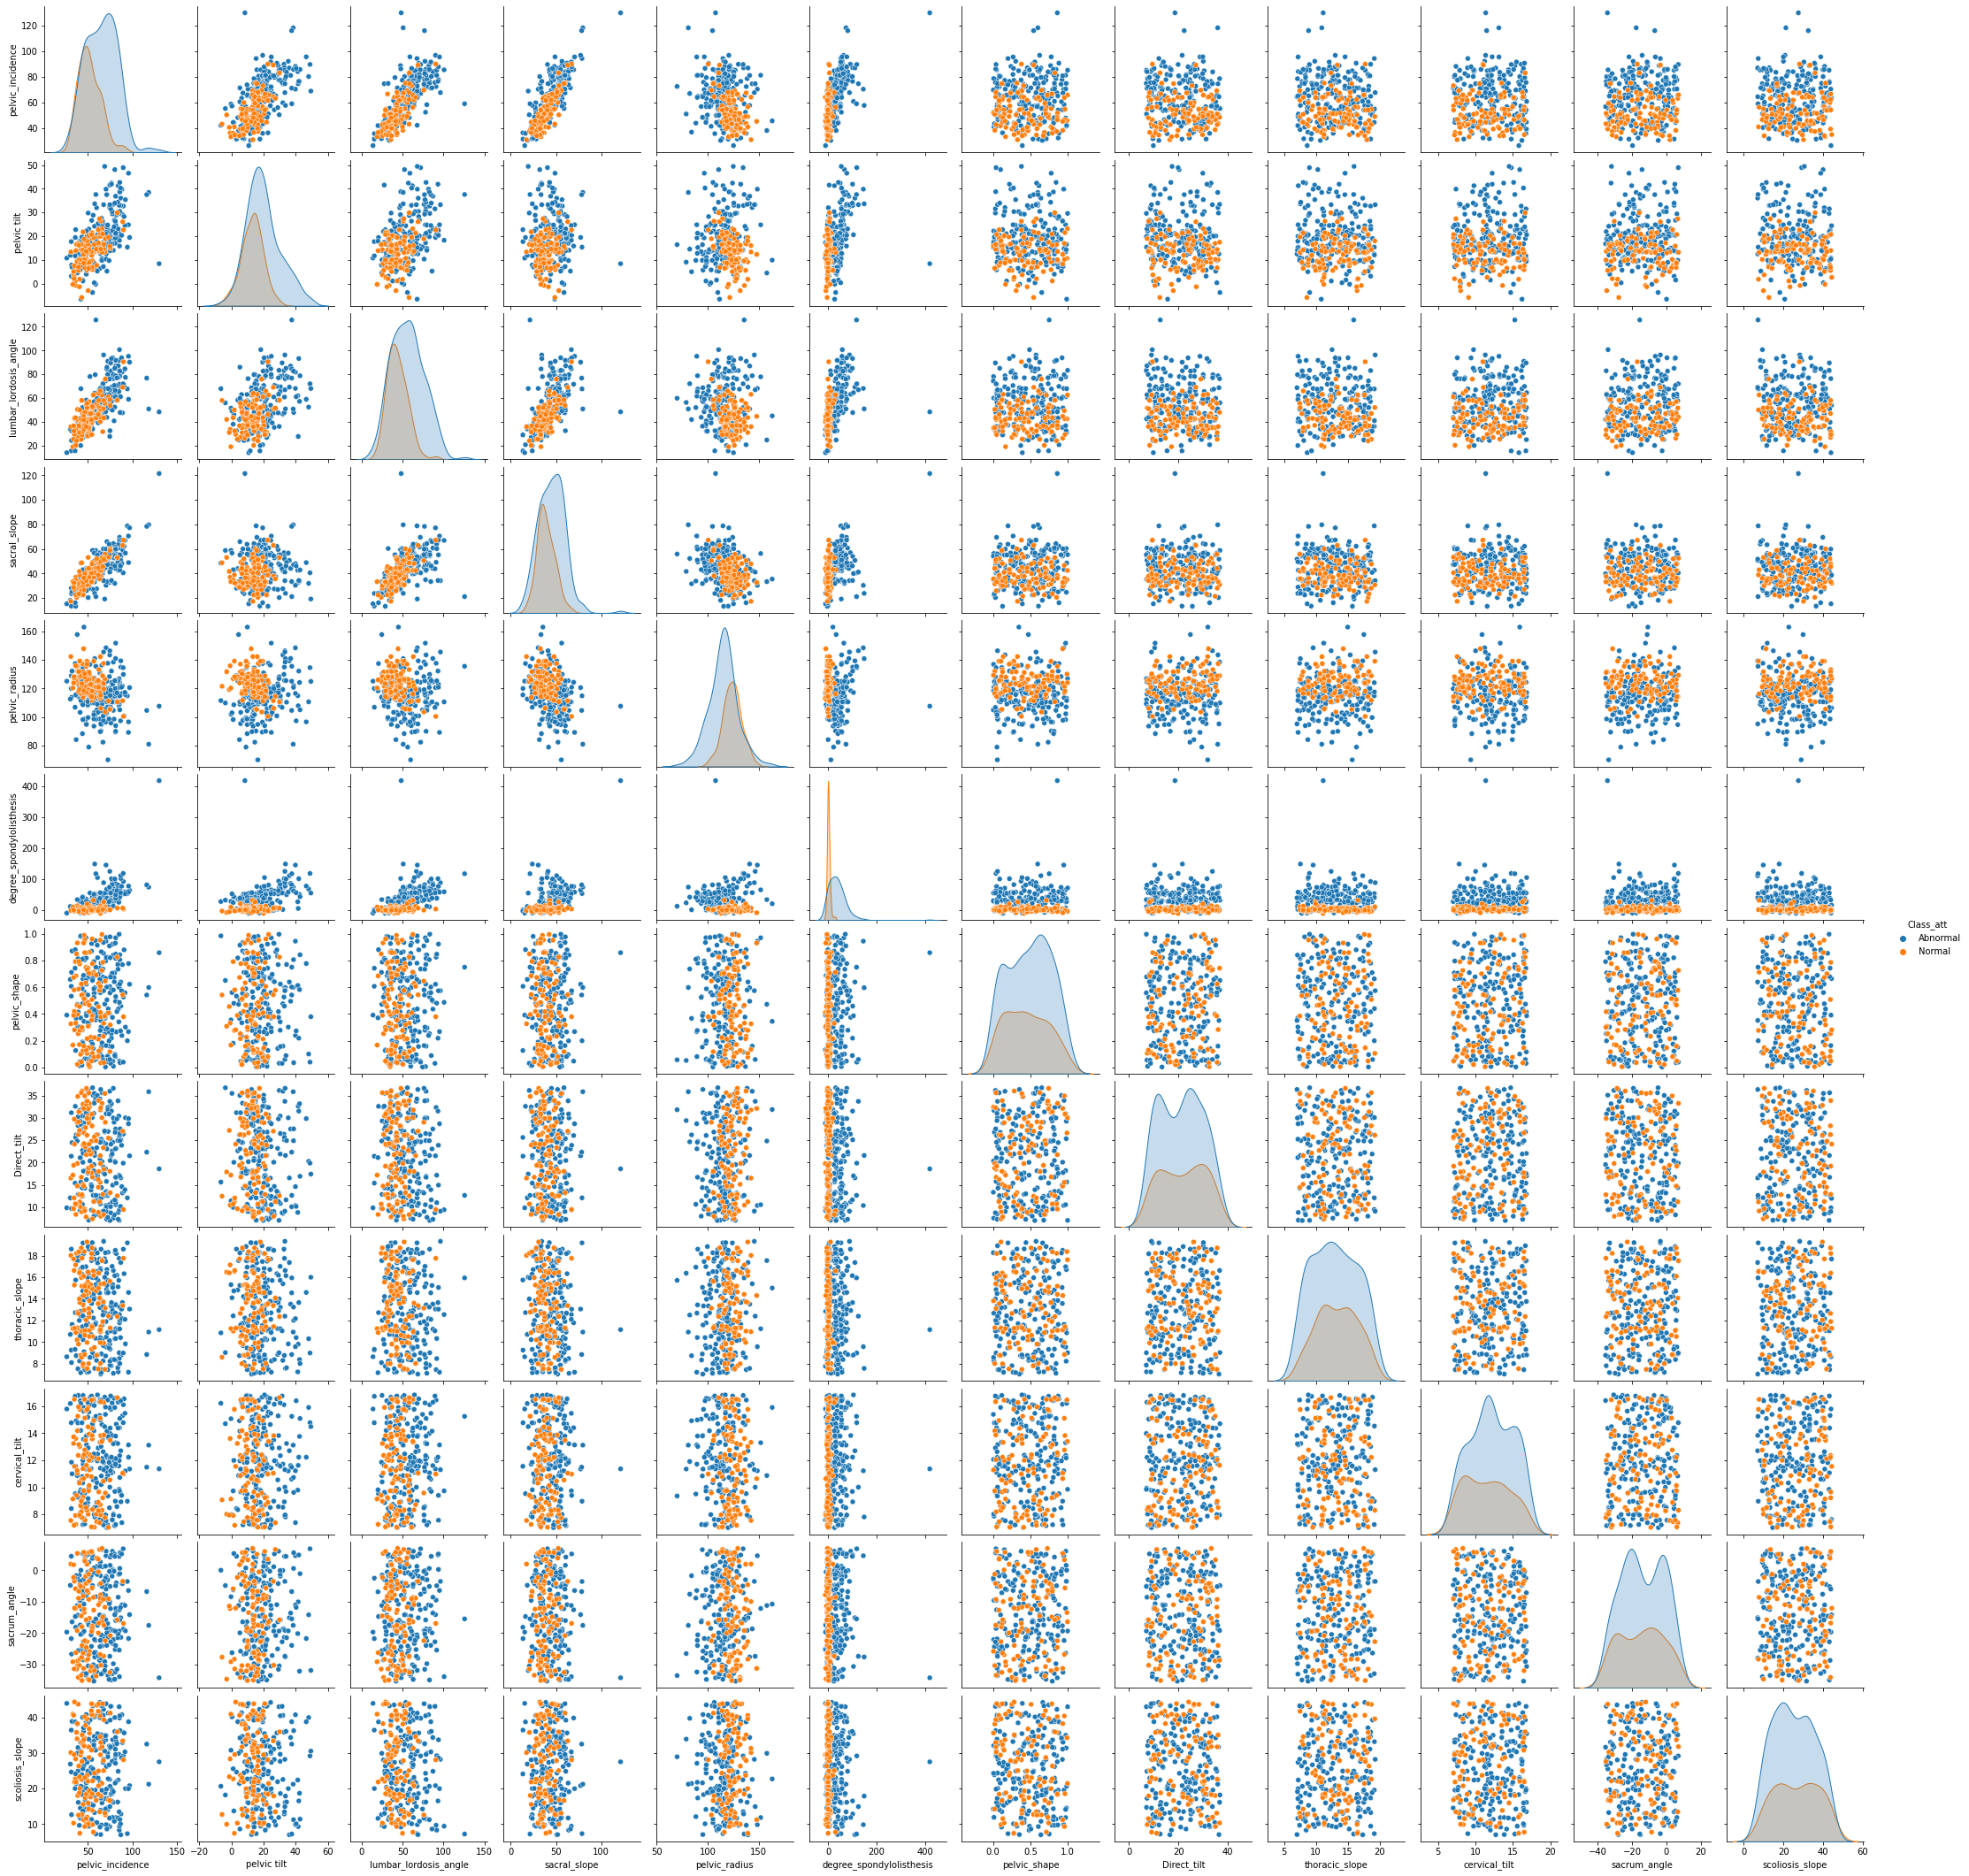

In [54]:
sns.pairplot(df, hue = 'Class_att')

In [55]:
# as seen from the pairplot, the abnormal and normal states are clustered separately for most of the graphs

<AxesSubplot:xlabel='Class_att', ylabel='pelvic tilt'>

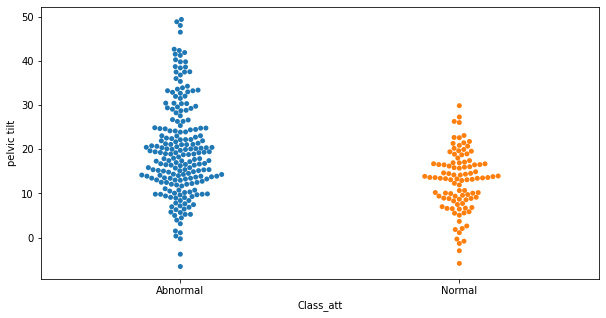

In [56]:
plt.figure(figsize=(10,5))
sns.swarmplot(x = df['Class_att'],y = df['pelvic tilt'])

<AxesSubplot:xlabel='Class_att', ylabel='pelvic_incidence'>

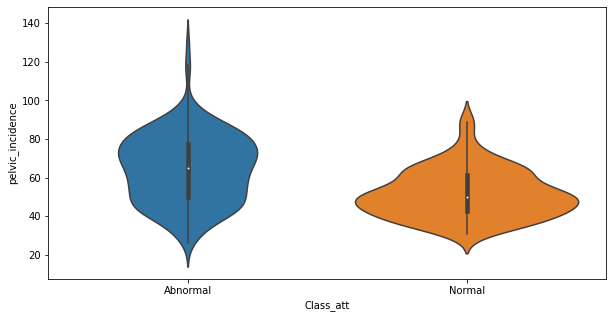

In [57]:
plt.figure(figsize=(10,5))
sns.violinplot(x = df['Class_att'],y = df['pelvic_incidence'])

In [58]:
plt.figure(figsize=(10,5))
ex.box(x = df['Class_att'], y = df['lumbar_lordosis_angle'])

<Figure size 720x360 with 0 Axes>

In [59]:
"""1. As seen from the above graphs, the pelvic tilt for abnormal and normal clustered around the same range. 
2.Whereas there is a clear difference  in clusters with peliv_incidence. 
3.The same applies to lumbar_lordosis_angle as abnormal and normal cases have different medians.
4. Overall adnormal cases are less custered than the normal cases (but that could just be because there are 
way fewer normal cases than abnormal cases)"""

'1. As seen from the above graphs, the pelvic tilt for abnormal and normal clustered around the same range. \n2.Whereas there is a clear difference  in clusters with peliv_incidence. \n3.The same applies to lumbar_lordosis_angle as abnormal and normal cases have different medians.\n4. Overall adnormal cases are less custered than the normal cases (but that could just be because there are \nway fewer normal cases than abnormal cases)'

<AxesSubplot:>

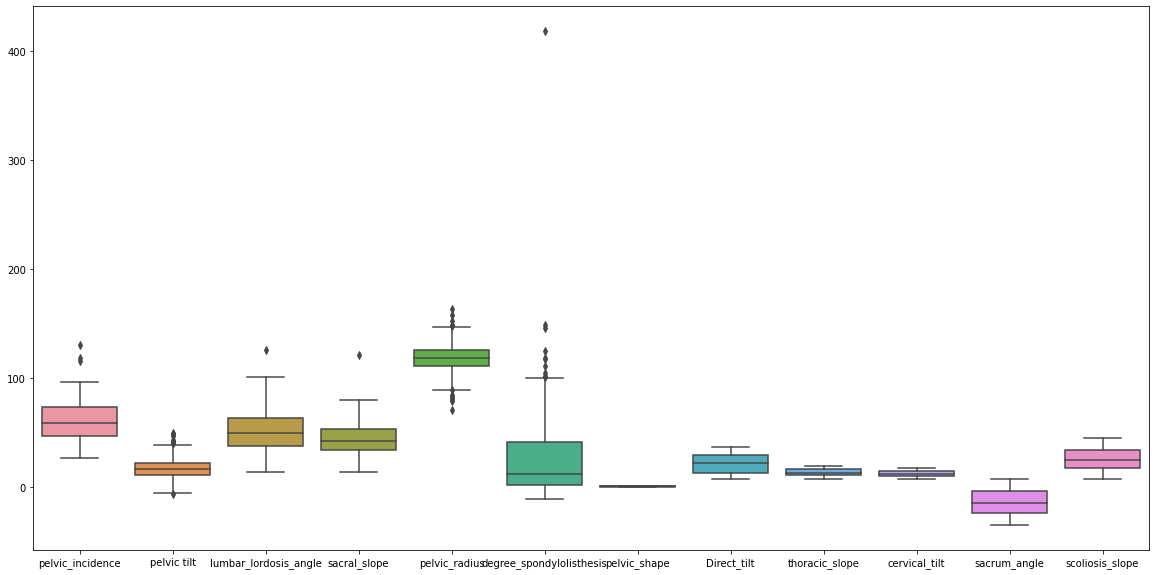

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df)


In [61]:
'''as seen from the boxplot above there are outliers in the pelvic_incidence, pelvic_tilt,lumbar_lordosis,sacral_slope,pelvic_radius
and degree_spondylolisthesis'''
#Data cleansing: removing outliers
#I will be using a range of 3 standard deviations to define the upper and lower limits

'as seen from the boxplot above there are outliers in the pelvic_incidence, pelvic_tilt,lumbar_lordosis,sacral_slope,pelvic_radius\nand degree_spondylolisthesis'

In [65]:
df.columns
lower_limit = df['pelvic_incidence'].mean() - (3*df['pelvic_incidence'].std())
upper_limit = df['pelvic_incidence'].mean() + (3*df['pelvic_incidence'].std())
df2 = df[(df['pelvic_incidence']>lower_limit)&(df['pelvic_incidence']<upper_limit)]
#removing outliers in pelvic incidence

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_shape,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [67]:
lower_limit = df2['pelvic tilt'].mean() - (3*df2['pelvic tilt'].std())
upper_limit = df2['pelvic tilt'].mean() + (3*df2['pelvic tilt'].std())
df3 = df2[(df2['pelvic tilt']>lower_limit)&(df2['pelvic tilt']<upper_limit)]


In [70]:
lower_limit = df3['lumbar_lordosis_angle'].mean() - (3*df3['lumbar_lordosis_angle'].std())
upper_limit = df3['lumbar_lordosis_angle'].mean() + (3*df3['lumbar_lordosis_angle'].std())
df4 = df3[(df3['lumbar_lordosis_angle']>lower_limit)&(df3['lumbar_lordosis_angle']<upper_limit)]

In [71]:
lower_limit = df4['degree_spondylolisthesis'].mean() - (3*df4['degree_spondylolisthesis'].std())
upper_limit = df4['degree_spondylolisthesis'].mean() + (3*df4['degree_spondylolisthesis'].std())
df5 = df4[(df4['degree_spondylolisthesis']>lower_limit)&(df4['degree_spondylolisthesis']<upper_limit)]

In [73]:
lower_limit = df5['pelvic_radius'].mean() - (3*df5['pelvic_radius'].std())
upper_limit = df5['pelvic_radius'].mean() + (3*df5['pelvic_radius'].std())
df6 = df5[(df5['pelvic_radius']>lower_limit)&(df5['pelvic_radius']<upper_limit)]

In [75]:
df6.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_shape                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

In [77]:
#ok time to model the data using KNN theory
X = df6.drop('Class_att', axis = 1)
y = df6['Class_att']

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
scaler.fit(X)
scaled_features = scaler.transform(X)

In [80]:
df_scaled  = pd.DataFrame(scaled_features, columns = df6.columns[:-1])

In [85]:
from sklearn.model_selection import train_test_split
X = df_scaled
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
#choosing the correct K value using the elbow method
error_rate = []
for i in range(1,40):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #mean of predictions made by the model that were incorrect

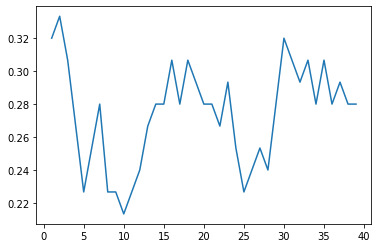

In [89]:
plt.plot(range(1,40), error_rate)

In [90]:
#the lowest error rate is observed when k = 10
knn =KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)

In [91]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

    Abnormal       0.88      0.81      0.84        52
      Normal       0.63      0.74      0.68        23

    accuracy                           0.79        75
   macro avg       0.75      0.77      0.76        75
weighted avg       0.80      0.79      0.79        75



In [92]:
print(confusion_matrix(y_test,pred_i))

[[42 10]
 [ 6 17]]


In [93]:
accuracy_score(y_test,pred_i)

0.7866666666666666

In [ ]:
#  An accuracy of 78.6% is achieved when using KNN 